In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import timedelta
import seaborn as sns

In [2]:
start_date = dt.date(2020, 2, 21)
pre_start_date = dt.date(2019, 12, 15)
ddt = -((pre_start_date - start_date).days)
ddt

68

<AxesSubplot:title={'center':'Daily new hospitalizations (Lombardy)'}>

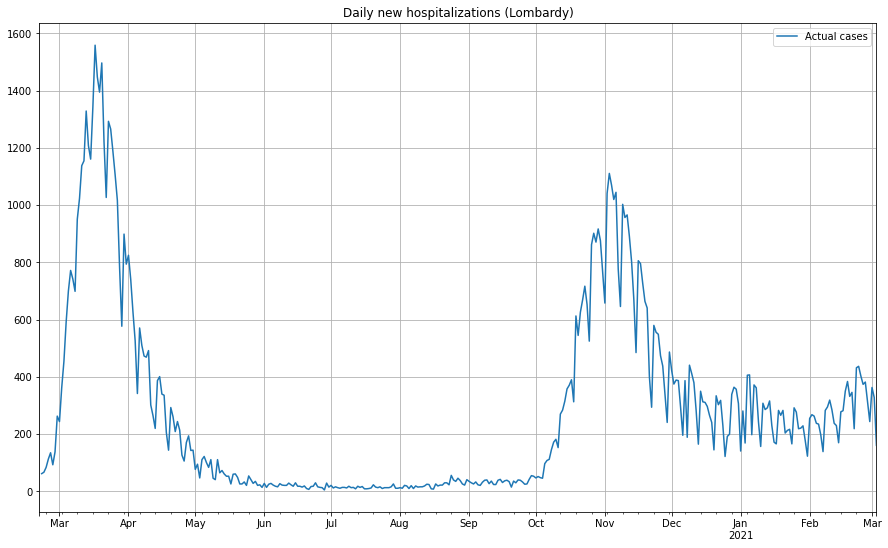

In [4]:
cases = pd.read_csv('/data/medical/covid/lombardy-cases-2021-03.csv', index_col=0, parse_dates=[1,2])
cases = cases.query('hospitalization == "yes"')
#cases = cases[(cases['altersjahr'] > 4) & (cases['altersjahr'] < 13)]
cases_count = pd.DataFrame(cases.groupby('date_diagnosi')['date_birth'].count())
cases_count.columns = ['Actual cases']
cases_count = cases_count.rename_axis('Date')
#cases_count = cases_count.rename(index = {'eingang_dt': 'Date'})
#cases_count.plot(grid = True, figsize = (12, 7))
period = pd.date_range(cases_count.index[0], cases_count.index[-1])
cases_count = cases_count.reindex(period, fill_value=0)[:-1]
cases_count = cases_count.cumsum()
cases = cases_count
cases.diff().plot(grid = True, figsize = (15, 9), title = 'Daily new hospitalizations (Lombardy)')

In [5]:
# cases = pd.read_csv('/data/medical/covid/lombardy-cases-2021-04.csv', index_col=0, parse_dates=[1,2])
# cases = cases.query('Hospitalization == "SI"')
# #cases = cases[(cases['altersjahr'] > 4) & (cases['altersjahr'] < 13)]
# cases_count = pd.DataFrame(cases.groupby('Diagnosis date')['Date of birth'].count())
# cases_count.columns = ['Actual cases']
# cases_count = cases_count.rename_axis('Date')
# #cases_count = cases_count.rename(index = {'eingang_dt': 'Date'})
# #cases_count.plot(grid = True, figsize = (12, 7))
# period = pd.date_range(cases_count.index[0], cases_count.index[-1])
# cases_count = cases_count.reindex(period, fill_value=0)[:-1]
# cases_count = cases_count.cumsum()
# cases = cases_count
# cases.diff().plot(grid = True, figsize = (15, 9), title = 'Daily new hospitalizations (Lombardy)')

In [6]:
all_cases = pd.read_csv('/data/medical/covid/lombardy-cases-2021-03.csv', index_col=0, parse_dates=[1,2])
all_cases1 = all_cases.dropna(subset=['date_birth'])
all_cases1['date_diagnosi'].fillna('2020-11-03')
all_cases1['date_diagnosi'] = pd.to_datetime(all_cases1['date_diagnosi'])
all_cases1['Years'] = (all_cases1['date_diagnosi'].subtract(all_cases1['date_birth']))/ timedelta(days=365)
cases_hosp = all_cases1.query('hospitalization == "yes"')
all_cases1.head()

<ipython-input-6-38b7d2fdbc66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cases1['date_diagnosi'] = pd.to_datetime(all_cases1['date_diagnosi'])
<ipython-input-6-38b7d2fdbc66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cases1['Years'] = (all_cases1['date_diagnosi'].subtract(all_cases1['date_birth']))/ timedelta(days=365)


date_birth date_diagnosi residency hospitalization    outcome      Years
ID                                                                         
1  1937-05-15    2020-02-22        BG             yes       dead  82.830137
2  1987-03-23    2020-02-22        CR             yes  recovered  32.942466
3  1976-06-14    2020-02-22        CR             yes  recovered  43.720548
4  1951-12-04    2020-02-23        CR             yes  recovered  68.268493
5  1982-11-29    2020-02-23        LO              no  recovered  37.260274

In [13]:
hosp_dead = all_cases1.query('hospitalization == "yes" and outcome == "dead"').shape[0]
nonhosp_dead = all_cases1.query('hospitalization != "yes" and outcome == "dead"').shape[0]
hosp_recovered = all_cases1.query('hospitalization == "yes" and outcome != "dead"').shape[0]
nonhosp_recovered = all_cases1.query('hospitalization != "yes" and outcome != "dead"').shape[0]
states = pd.Series([hosp_dead, nonhosp_dead, hosp_recovered, nonhosp_recovered])
states / states.sum()

0    0.035458
1    0.010450
2    0.139150
3    0.814941
dtype: float64

In [14]:
cases_by_age = pd.DataFrame()
for i in range(0, 16):
    age_low = i * 5
    age_hi = age_low + 5 if i < 15 else 999
    cases_group = cases_hosp.query('Years >= @age_low and Years < @age_hi')
    cases_count = pd.DataFrame(cases_group.groupby('date_diagnosi')['date_birth'].count())
    cases_count.columns = ['Actual cases']
    cases_count = cases_count.rename_axis('Date')
    period = pd.date_range(cases.index[0], cases.index[-1])
    cases_count = cases_count.reindex(period, fill_value=0)[:-1]
    cases_count = cases_count.cumsum()
    column = 'i{}'.format(i)
    cases_by_age[column] = cases_count.squeeze()
cases_by_age

i0   i1   i2   i3    i4    i5    i6    i7    i8    i9   i10  \
2020-02-21    0    0    0    0     0     0     1     2     1     0     2   
2020-02-22    0    0    0    2     1     2     4     4     4     3     7   
2020-02-23    0    0    0    2     3     4    10     7     8     8    11   
2020-02-24    0    0    1    3     4     5    13    11    10    12    17   
2020-02-25    1    1    1    4     5    11    15    13    16    17    23   
...         ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
2021-02-26  741  258  406  641  1183  1842  2373  2762  3533  5515  7372   
2021-02-27  748  260  407  642  1188  1848  2377  2772  3551  5531  7395   
2021-02-28  751  261  408  647  1193  1859  2384  2780  3566  5538  7409   
2021-03-01  757  262  409  650  1197  1866  2397  2795  3583  5558  7427   
2021-03-02  760  264  410  654  1200  1873  2404  2810  3595  5569  7444   

             i11   i12   i13    i14    i15  
2020-02-21     3     4     2      3      4  
2020-02-22    10    10    10      9     18  
2020-02-23    17    15    15     16     35  
2020-02-24    21    24    23     27     64  
2020-02-25    30    36    34     45     96  
...          ...   ...   ...    ...    ...  
2021-02-26  8732  8893  9297  11699  40254  
2021-02-27  8757  8912  9330  11732  40364  
2021-02-28  8771  8933  9352  11758  40448  
2021-03-01  8799  8955  9385  11801  40580  
2021-03-02  8826  8980  9411  11840  40709  

[376 rows x 16 columns]

In [15]:
all_cases_by_age = pd.DataFrame()
for i in range(0, 16):
    age_low = i * 5
    age_hi = age_low + 5 if i < 15 else 999
    cases_group = all_cases1.query('Years >= @age_low and Years < @age_hi')
    cases_count = pd.DataFrame(cases_group.groupby('date_diagnosi')['date_birth'].count())
    cases_count.columns = ['Actual cases']
    cases_count = cases_count.rename_axis('Date')
    period = pd.date_range(cases.index[0], cases.index[-1])
    cases_count = cases_count.reindex(period, fill_value=0)[:-1]
    cases_count = cases_count.cumsum()
    column = 'i{}'.format(i)
    all_cases_by_age[column] = cases_count.squeeze()
all_cases_by_age

i0     i1     i2     i3     i4     i5     i6     i7     i8  \
2020-02-21     0      0      0      0      0      0      1      2      1   
2020-02-22     0      0      0      2      1      3      5      7      5   
2020-02-23     1      1      0      3      6     11     16     17     12   
2020-02-24     1      1      1      6      9     21     27     26     17   
2020-02-25     2      5      1      8     10     29     31     30     26   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-02-26  8496  14571  22418  25890  31462  36525  36028  37175  42813   
2021-02-27  8569  14686  22606  26111  31651  36695  36231  37367  43056   
2021-02-28  8576  14698  22616  26132  31684  36737  36260  37403  43119   
2021-03-01  8679  14845  22878  26412  31925  36979  36521  37694  43456   
2021-03-02  8803  15011  23153  26722  32205  37285  36825  38034  43861   

               i9    i10    i11    i12    i13    i14    i15  
2020-02-21      1      2      4      4      2      4      9  
2020-02-22      6      9     12     11     11     10     26  
2020-02-23     15     23     24     23     18     21     51  
2020-02-24     23     39     33     34     26     33     83  
2020-02-25     32     56     43     47     40     52    115  
...           ...    ...    ...    ...    ...    ...    ...  
2021-02-26  53333  55900  50686  36295  27754  27723  88273  
2021-02-27  53616  56159  50921  36486  27920  27847  88537  
2021-02-28  53672  56212  50975  36520  27955  27881  88654  
2021-03-01  54072  56576  51305  36757  28147  28049  89008  
2021-03-02  54554  57025  51727  37068  28390  28273  89538  

[376 rows x 16 columns]

<AxesSubplot:title={'center':'Distribution of patients by age groups'}>

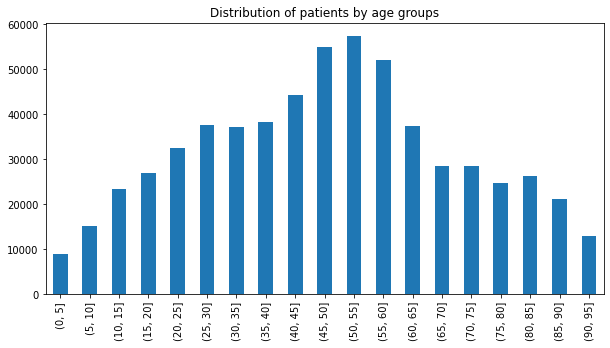

In [16]:
age = pd.cut(all_cases1['Years'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
age_groups = age.value_counts().sort_index()
age_groups.plot(kind='bar', title='Distribution of patients by age groups', figsize=(10, 5))

In [17]:
last = cases_by_age.iloc[-250:].sum()
last_all = all_cases_by_age.iloc[-250:].sum()
pyr = pd.read_csv('/home/atemerev/devel/epinetcpp/Italy-2020.csv')
age_groups = (pyr['M'] + pyr['F'])
total = age_groups.sum()
#norm = age_groups / total
#norm.plot()
norm = last / last_all
#norm = norm.reindex(index = last.index)
norm

i0     0.122877
i1     0.027407
i2     0.024666
i3     0.033357
i4     0.049271
i5     0.067569
i6     0.089588
i7     0.104695
i8     0.118485
i9     0.149360
i10    0.185288
i11    0.239841
i12    0.335410
i13    0.441119
i14    0.527289
i15    0.478542
dtype: float64

# Simulation starts

In [15]:
df = pd.DataFrame()
#for r in range(1, 11):
#tally_file = '/data/medical/simulations/milan8/r1/1/tally.csv'

for r in range(1, 51):
    tally_file = '/data/medical/simulations/milan500-95k-part2/res-{}.csv'.format(r)
    t = pd.read_csv(tally_file)
    for i in range(0, 16):
        column = 'r{}i{}'.format(r, i)
        _cases = t['h{}'.format(i * 5)]
        df[column] = _cases

In [16]:
df

r1i0  r1i1  r1i2  r1i3  r1i4  r1i5  r1i6  r1i7   r1i8   r1i9  ...  r50i6  \
0       0     0     0     0     0     0     0     0      0      0  ...      0   
1       0     0     0     0     0     0     0     0      0      0  ...      0   
2       0     0     0     0     0     0     0     0      0      0  ...      0   
3       0     0     0     0     0     0     0     0      0      0  ...      0   
4       0     0     0     0     0     0     0     0      0      0  ...      0   
..    ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...    ...   
725  6690  1658  1896  2244  3035  4965  7199  9110  11459  13397  ...   7415   
726  6693  1658  1896  2244  3035  4965  7199  9110  11459  13397  ...   7415   
727  6694  1658  1896  2244  3035  4965  7199  9110  11459  13397  ...   7415   
728  6696  1659  1896  2244  3035  4965  7199  9110  11459  13397  ...   7415   
729  6696  1660  1896  2244  3035  4965  7199  9110  11459  13397  ...   7415   

     r50i7  r50i8  r50i9  r50i10  r50i11  r50i12  r50i13  r50i14  r50i15  
0        0      0      0       0       0       0       0       0       0  
1        0      0      0       0       0       0       0       0       0  
2        0      0      0       0       0       0       0       0       0  
3        0      0      0       0       0       0       0       0       0  
4        0      0      0       0       0       0       0       0       0  
..     ...    ...    ...     ...     ...     ...     ...     ...     ...  
725   8912  11711  13680   15503   15296   17076   17188   16108   15600  
726   8912  11711  13680   15503   15296   17076   17188   16108   15600  
727   8912  11711  13680   15503   15296   17076   17188   16108   15600  
728   8912  11711  13680   15503   15296   17076   17188   16108   15600  
729   8912  11711  13680   15503   15296   17076   17188   16108   15600  

[730 rows x 800 columns]

<AxesSubplot:>

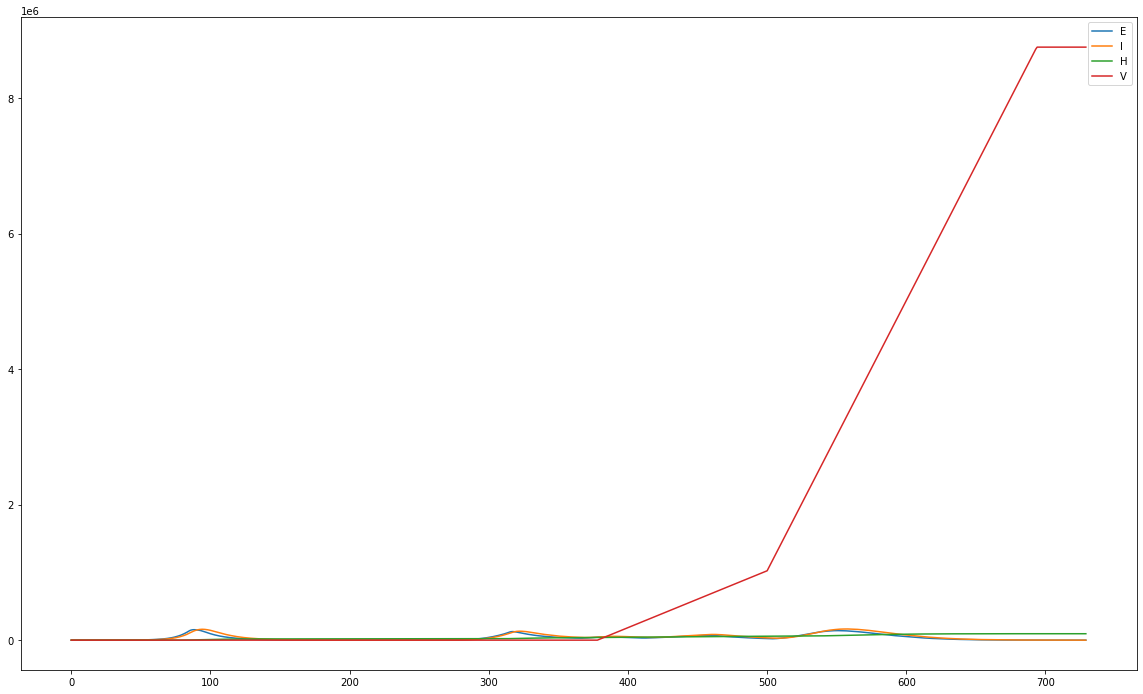

In [5]:
ddf = pd.read_csv('./tally.csv')
ddf[['E', 'I', 'H', 'V']].plot(figsize=(20, 12))

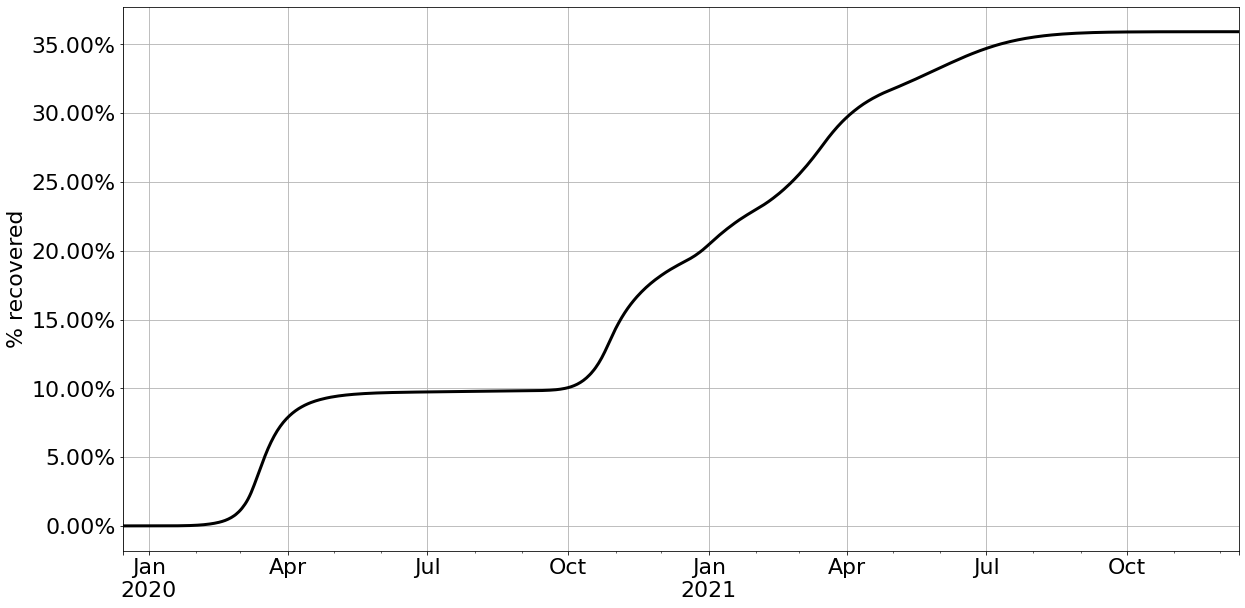

In [6]:
plt.rcParams.update({'font.size': 22})
tt = (((t['R'] + t['I']) / t['S'][0]) * 100)
tt.index = tt.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
tt.index = pd.to_datetime(tt.index)
ax = tt.plot(figsize=(20, 10), color='black', lw=3, grid=True)
ax.set_ylabel('% recovered')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
plt.savefig("/home/atemerev/Documents/sero.svg")
plt.show()

In [7]:
cdf

NameError: name 'cdf' is not defined

In [8]:
#sero = pd.DataFrame()
#for r in range(1, 9):
#    for i in range(1, 2):
#        tally_file = '/opt/run/{}/tally.csv'.format(r)
#        t = pd.read_csv(tally_file)
#        tt = (((t['R'] + t['I']) / t['S'][0]) * 100)
#        tt.index = tt.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
#        column = 'r{}i{}'.format(r, i)
#        sero[column] = tt
#sero

In [57]:
#msero = pd.melt(frame = sero, var_name = 'column', value_name = 'value', ignore_index=False)
#msero

In [58]:
#fig, ax = plt.subplots()
#sns.lineplot(ax = ax,
#             data = msero,
#             x = 'x',
#             y = 'value')
#plt.show()

In [59]:
#ax = sero.plot(figsize=(20, 12), color='black', lw=3, grid=True, alpha=0.2, legend=False)
#ax.set_ylabel('% recovered')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
#plt.savefig("/home/atemerev/Documents/sero.pdf")
#plt.show()

In [60]:
plt.savefig("/home/atemerev/Documents/sero.pdf")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

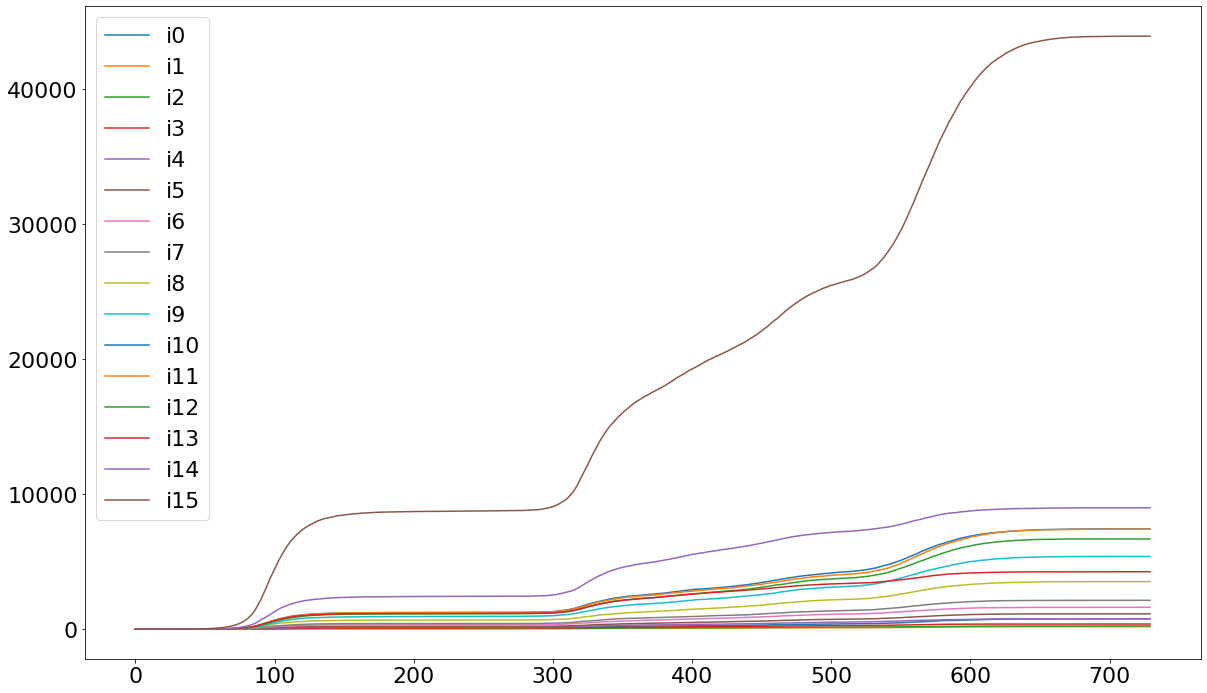

In [61]:
df.plot(figsize=(20,12))

In [17]:
cdf = df.diff()


In [18]:
cdf.index = cdf.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
cdf.index = pd.to_datetime(cdf.index)

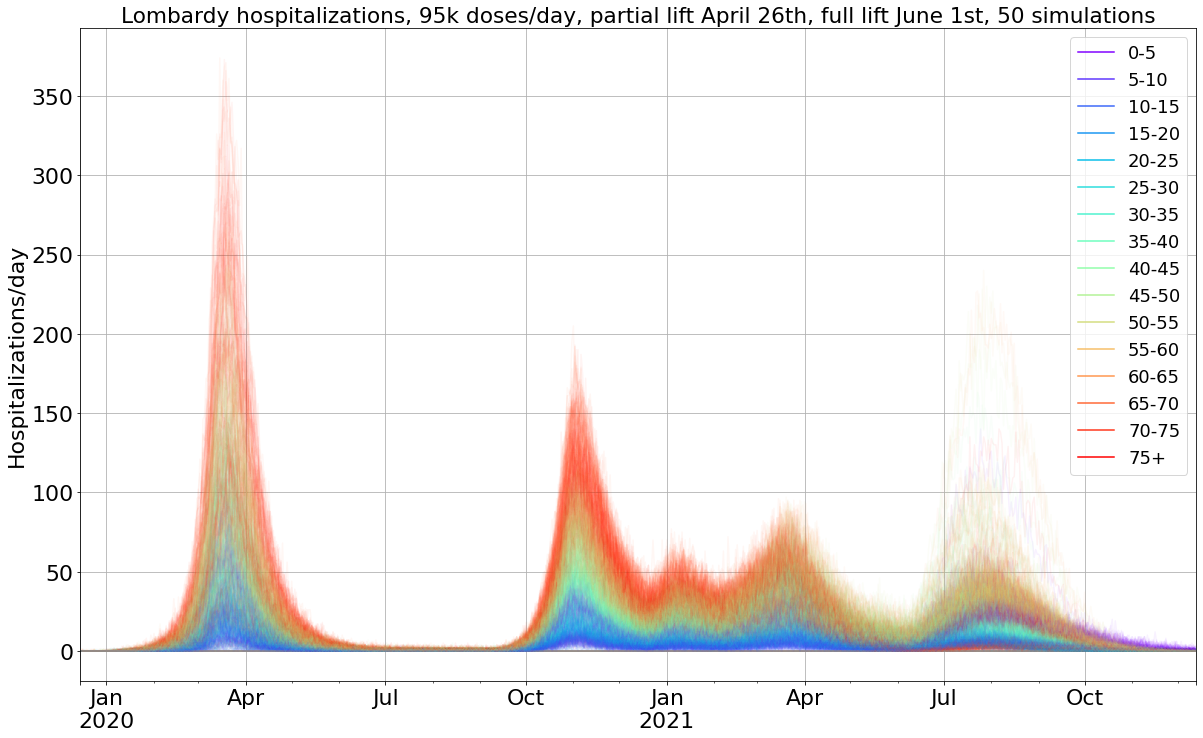

In [21]:
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]
plt.rcParams.update({'font.size': 22})
ax=cdf.plot(figsize=(20,12), legend=True, color=colors, alpha=0.05, grid = True)
plt.rcParams.update({'font.size': 18})
leg = ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title('Lombardy hospitalizations, 95k doses/day, partial lift April 26th, full lift June 1st, 50 simulations')
ax.set_ylabel('Hospitalizations/day')
plt.savefig('/home/atemerev/Documents/age-bands-partial.pdf')
plt.show()

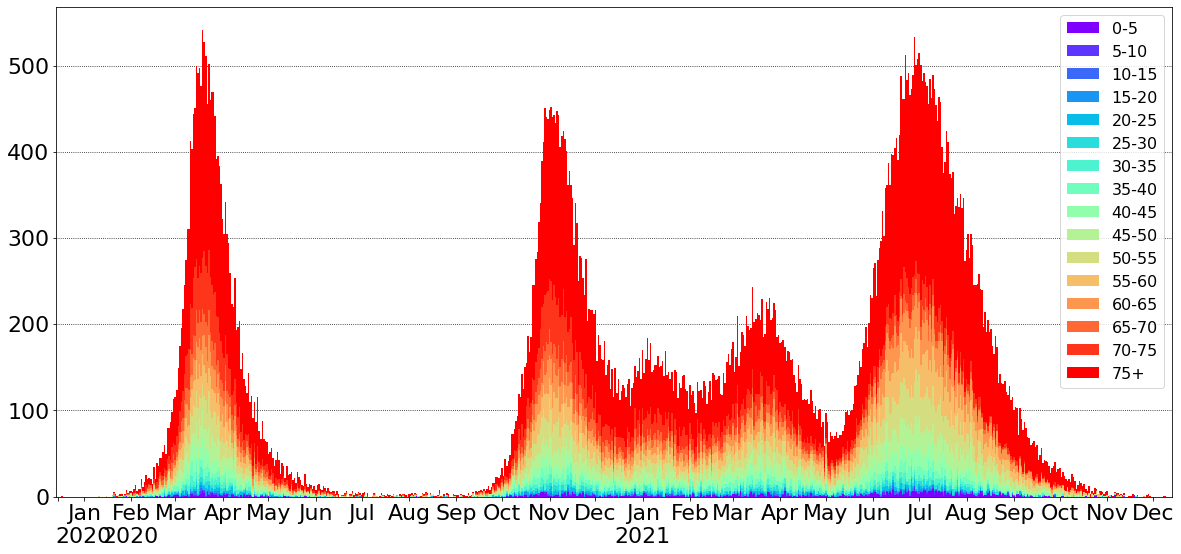

In [65]:
plt.rcParams.update({'font.size': 22})
ticks  = []
labels = []
first_month = True
tdf = cdf
for i, ts in enumerate(tdf.index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != tdf.index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != tdf.index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax = tdf.plot.bar(stacked = True, figsize=(20, 10), color = colors, legend = False, grid = False, width=1.0)
#leg = plt.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
plt.savefig("/home/atemerev/Documents/t2.pdf", bbox_inches='tight')
plt.show()

<AxesSubplot:>

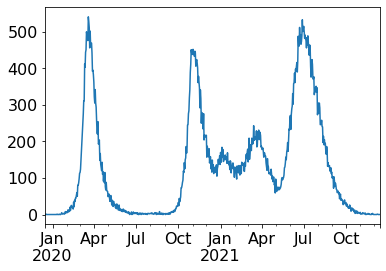

In [66]:
cdf.sum(axis = 1).plot()

<AxesSubplot:>

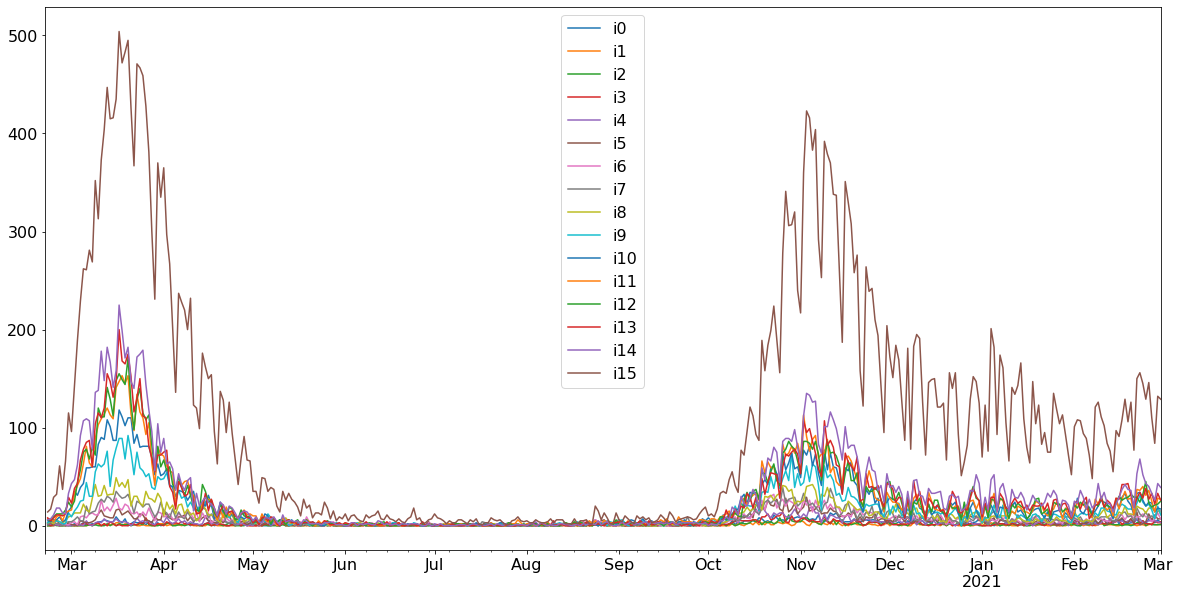

In [67]:
cases_by_age.diff().plot(figsize=(20, 10))

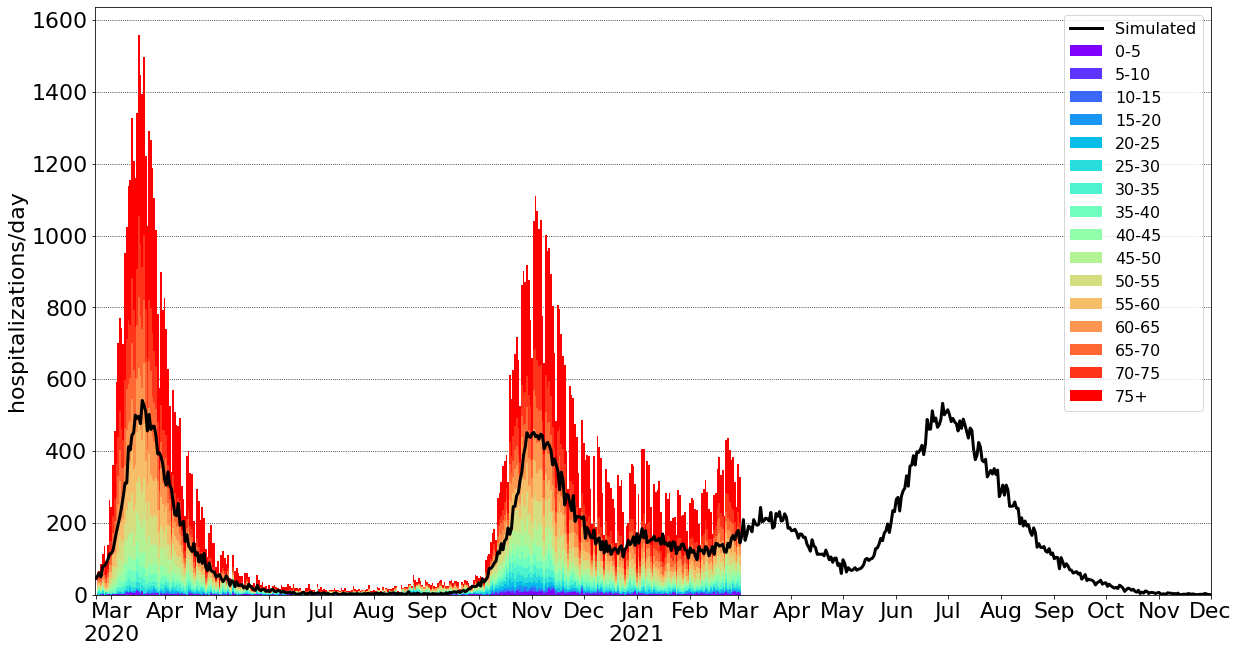

In [68]:
plt.rcParams.update({'font.size': 22})

ticks  = []
labels = []
first_month = True
for i, ts in enumerate(cdf[ddt:].index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != cdf[ddt:].index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != cdf[ddt:].index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax1 = cases_by_age.diff().reset_index().iloc[:,1:].plot(kind='bar', stacked=True, figsize=(20, 12), color = colors, alpha=1, legend=False, grid=False, width=1.0)
cut = cases_by_age.shape[0]
ax = cdf[ddt:].sum(axis=1).reset_index().iloc[:,1:].plot(ax=ax1, color='black', lw=3)
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.legend(['Simulated', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'], loc='best')
ax.set_ylabel('hospitalizations/day')
#ax.legend(leg)
plt.savefig("/home/atemerev/Documents/sim-compare.pdf", bbox_inches='tight')
plt.show()


In [69]:
cdf[ddt:]

i0   i1   i2   i3   i4   i5   i6   i7   i8   i9  i10  i11  i12  \
2020-02-21  0.0  0.0  0.0  0.0  0.0  0.0  1.0  4.0  2.0  0.0  4.0  2.0  1.0   
2020-02-22  0.0  0.0  0.0  0.0  0.0  0.0  4.0  1.0  3.0  1.0  1.0  1.0  3.0   
2020-02-23  1.0  0.0  0.0  0.0  2.0  3.0  3.0  2.0  0.0  4.0  1.0  5.0  3.0   
2020-02-24  0.0  0.0  0.0  0.0  1.0  0.0  1.0  2.0  1.0  3.0  2.0  3.0  5.0   
2020-02-25  1.0  0.0  0.0  0.0  1.0  1.0  1.0  3.0  4.0  1.0  5.0  2.0  7.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2021-12-09  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-12-10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-12-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-12-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-12-13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            i13   i14   i15  
2020-02-21  4.0   7.0  20.0  
2020-02-22  5.0   5.0  28.0  
2020-02-23  3.0   6.0  27.0  
2020-02-24  5.0   8.0  19.0  
2020-02-25  4.0  14.0  36.0  
...         ...   ...   ...  
2021-12-09  0.0   0.0   1.0  
2021-12-10  0.0   0.0   0.0  
2021-12-11  0.0   0.0   0.0  
2021-12-12  0.0   0.0   0.0  
2021-12-13  0.0   0.0   0.0  

[662 rows x 16 columns]

In [70]:
ddt

68